In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import matplotlib.pyplot as plt

In [37]:
from rlway.schedules import Schedule
schedule = Schedule(10,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN

In [38]:
schedule._df.index=[
    "S1",
    "S2",
    "CVG1",
    "T1",
    "S3",
    "CVG2",
    "T2",
    "DVG",
    "A1",
    "A2"
]

In [39]:
schedule

        0         1         2     
        s    e    s    e    s    e
S1    NaN  NaN  NaN  NaN  NaN  NaN
S2    NaN  NaN  NaN  NaN  NaN  NaN
CVG1  NaN  NaN  NaN  NaN  NaN  NaN
T1    NaN  NaN  NaN  NaN  NaN  NaN
S3    NaN  NaN  NaN  NaN  NaN  NaN
CVG2  NaN  NaN  NaN  NaN  NaN  NaN
T2    NaN  NaN  NaN  NaN  NaN  NaN
DVG   NaN  NaN  NaN  NaN  NaN  NaN
A1    NaN  NaN  NaN  NaN  NaN  NaN
A2    NaN  NaN  NaN  NaN  NaN  NaN

In [171]:
schedule.df.at['S1', 0] =  [0, 1]
schedule.df.at['CVG1', 0] = [1, 2]
schedule.df.at['T1', 0] =  [2, 4]
schedule.df.at['CVG2', 0] =  [4, 5]
schedule.df.at['T2', 0] =  [5, 7]
schedule.df.at['DVG', 0] =  [7, 8]
schedule.df.at['A1', 0] =  [8, 9]

schedule.df.at['S2', 1] =  [4, 5]
schedule.df.at['CVG1', 1] = [5, 6]
schedule.df.at['T1', 1] =  [6, 8]
schedule.df.at['CVG2', 1] =  [8, 9]
schedule.df.at['T2', 1] =  [9, 11]
schedule.df.at['DVG', 1] =  [11, 12]
schedule.df.at['A2', 1] =  [12, 13]


schedule.df.at['S3', 2] =  [5,6]
schedule.df.at['CVG2', 2] =  [6, 7]
schedule.df.at['T2', 2] =  [7, 9]
schedule.df.at['DVG', 2] =  [9, 11]
schedule.df.at['A1', 2] =  [11, 12]

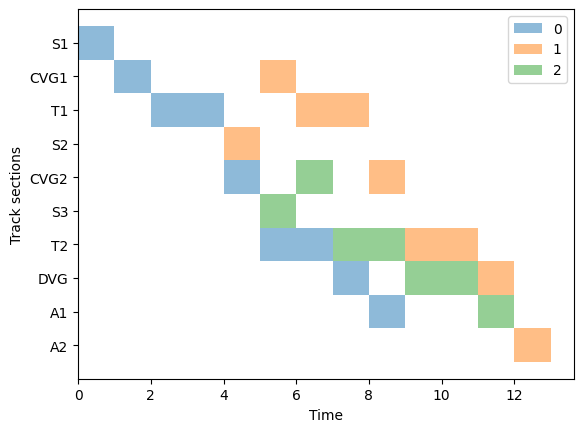

In [172]:
schedule.sort().plot()

In [173]:
from rlway.regul_env import RegulEnv

env = RegulEnv(schedule.sort(), stations=['A1', 'A2'])

In [174]:
def earliest_conflict(s):

    conflicts_times = [
        np.min(s.conflicts(train).stack())
        if not s.conflicts(train).stack().empty
        else np.inf
        for train in range(s.num_trains)
    ]

    if np.isfinite(np.min(conflicts_times)):
        other_train = np.argmin(conflicts_times)
        return s.first_conflict(other_train)
    return None, None

Text(0.5, 1.0, "('T2', 0)")

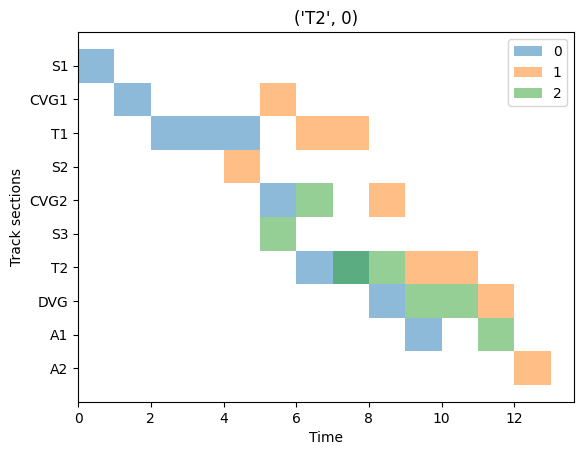

In [184]:
env.reset(delay=1., train=0, track_section='T1')
env.render()
plt.title(earliest_conflict(env.schedule))

In [185]:
print(env.delayed_train)

0
